In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Input

In [146]:
train_df = pd.read_csv('Google_Stock_Price_Train.csv')
test_df = pd.read_csv('Google_Stock_Price_Test.csv')

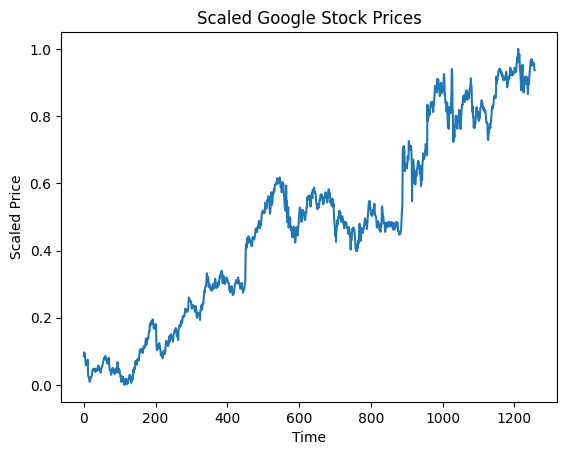

In [147]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_df[['Open']].values)

plt.plot(train_scaled)
plt.title("Scaled Google Stock Prices")
plt.xlabel("Time")
plt.ylabel("Scaled Price")
plt.show()

In [148]:
time_step = 120
x_train, y_train = [], []

for i in range(time_step, train_scaled.shape[0]):
    x_train.append(train_scaled[i-time_step:i, 0])
    y_train.append(train_scaled[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [149]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [150]:
model = Sequential([
    Input(shape=(x_train.shape[1], 1)),
    LSTM(100, activation='tanh', return_sequences=True), Dropout(0.3),
    LSTM(100, activation='tanh'), Dropout(0.3),
    Dense(1)
])

model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_41 (LSTM)                  │ (None, 120, 100)       │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 120, 100)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_42 (LSTM)                  │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,301 (473.83 KB)

 Trainable params: 121,301 (473.83 KB)

 Non-trainable params: 0 (0.00 B)

In [151]:
model.fit(x_train, y_train, epochs=200, batch_size=50, validation_split=0.05)

Epoch 1/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1956 - val_loss: 0.0917
Epoch 2/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0512 - val_loss: 0.0344
Epoch 3/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0443 - val_loss: 0.0334
Epoch 4/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0449 - val_loss: 0.0449
Epoch 5/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0402 - val_loss: 0.0399
Epoch 6/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0428 - val_loss: 0.0247
Epoch 7/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0402 - val_loss: 0.0246
Epoch 8/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0393 - val_loss: 0.0249
Epoch 9/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0410 - val_loss: 0.0222
Epoch 10/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0389 - val_loss: 0.0222
Epoch 11/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0396 - val_loss: 0.0588
Epoch 12/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

In [152]:
data = pd.concat((train_df['Open'], test_df['Open']), axis=0)
test_input = data[len(data) - len(test_df) - time_step:].values.reshape(-1, 1)

test_scaled = scaler.transform(test_input)

In [153]:
x_test = []
for i in range(time_step, test_scaled.shape[0]):
    x_test.append(test_scaled[i-time_step:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [154]:
y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


In [155]:
y_test = test_df['Open'].values
output = model.evaluate(x_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 806.5510


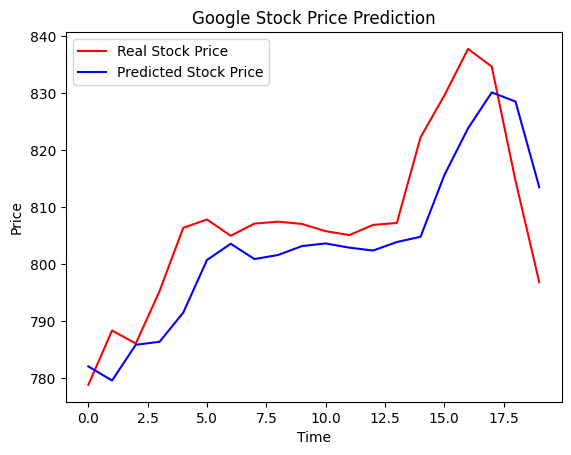

In [156]:
plt.plot(y_test, color='red', label='Real Stock Price')
plt.plot(y_pred, color='blue', label='Predicted Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()